# Analysis of Super bunnyhop's metacritic top 100 games
Just some quick data cleaning and analysis of the excel dataset he graciously provided.  
Discussed in his excellent video here: https://www.youtube.com/watch?v=4aTp4mliP9I  
I found the dataset was not particularly great, but still interesting. I think a good webscrape of the metacritic site would yield something a little more accurate :)  
My observations align with bunnyhop's although he certainly provides more insight than I have here.

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Import and initial clean

In [2]:
df = pd.read_excel("Metacritic_Top100Games_Output.xlsx", header=None)

#concat all review text columns
temp_df = df.iloc[:,14]
#14 to 144 are the text rows
for i in range(14,145):
    temp_df = temp_df.map(lambda x: str(x) + '|') + df.iloc[:,i].map(str)
temp_df = temp_df.map(lambda x: x.replace('nan','').replace('||',''))
df['review text'] = temp_df

#drop old text columns
df = df.drop(axis=1, labels = [x for x in range(14,145)])
df.columns = ['name', 'score', 'year released', 'platform', 'genre', 'rating', 'playtime1', 'playtime2', 'playtime3', 'playtime4', 'playtime5', 'playtime6', 'playtime7', 'numbers?', 'review text']

#drop last three columns since they are empty anyway
df = df.drop([99,100,101])

df.head(2)

,name,score,year released,platform,genre,rating,playtime1,playtime2,playtime3,playtime4,playtime5,playtime6,playtime7,numbers?,review text
0,Super Mario 64,94.0,1996,Nintendo 64,"Action, Platformer, 3D",E,13 Hours,19 Hours,22.5 Hours,17 Hours,NaN,NaN,NaN,13.0,It has quickly grown to become the standard by...
1,Quake,94.0,1996,PC,"Action, Shooter, Shooter, First-Person, Sci-Fi...",M,5 Hours,6.5 Hours,8.5 Hours,6 Hours,NaN,NaN,NaN,9.0,"Satan, your game has arrived. It spits up bloo..."


# Note on a data problem
Divinity: Original sin is listed as being released in 2019 on the Switch, but it was also released in 2018 on other consoles, and 2017 on PC accord to wikipedia. The PC entry on metacritic has a rating of 95 which is higher than the Switch version! I suspect this dataset is quite compromised :( For the mixed priorities of laziness and curiosity I am going to ignore these problems.

In [3]:
df[df['name'].map(lambda x: 'sin' in x.lower())]

,name,score,year released,platform,genre,rating,playtime1,playtime2,playtime3,playtime4,playtime5,playtime6,playtime7,numbers?,review text
98,Divinity: Original Sin II - Definitive Edition,93.0,2019,Switch,"Role-Playing, Western-Style",M,52.5 Hours,93.5 Hours,141 Hours,94 Hours,NaN,NaN,NaN,18.0,Divinity: Original Sin II is a masterpiece and...


# Missing entries
entries with playtimes 5-7 miss others. No idea what that means.

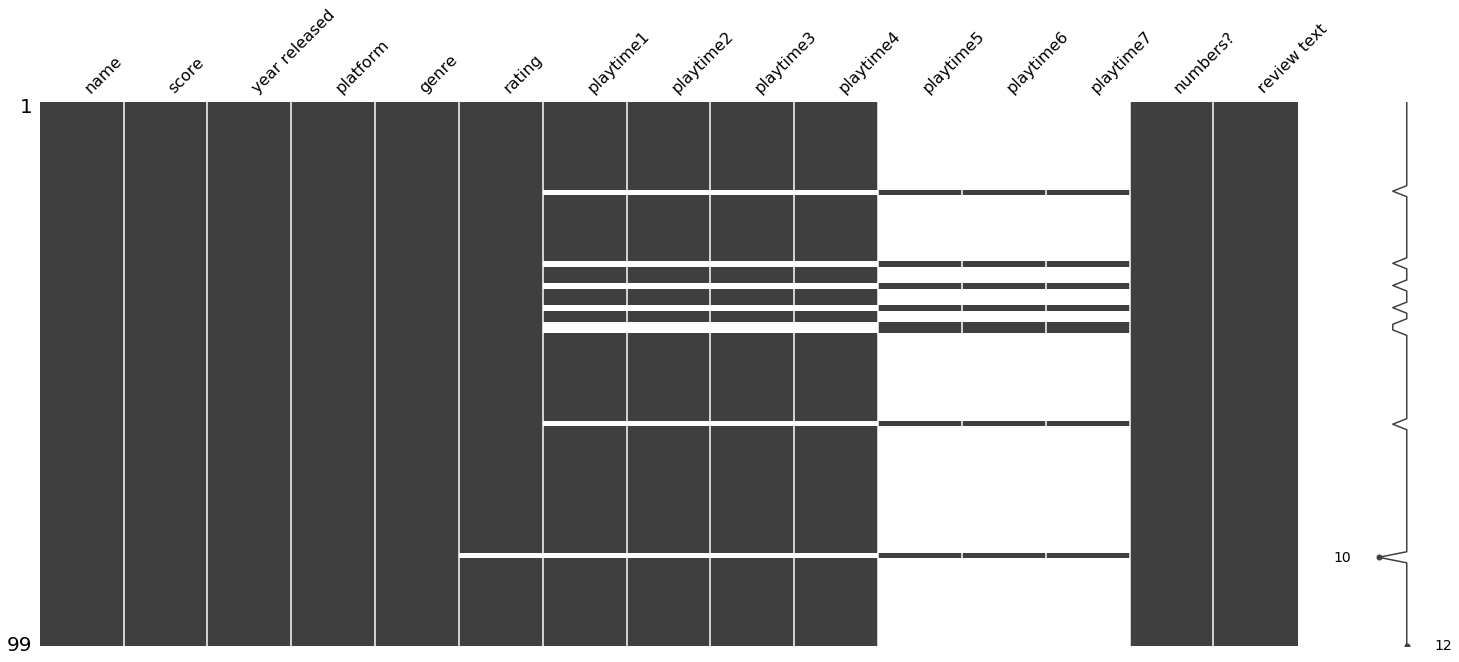

In [4]:
#check missing entries
msno.matrix(df)

## Whats the deal with the numbers column?
Still unclear when checking frequencies, some numbers appear 3 times or twice but I've no idea why.

In [5]:
print(Counter(df['numbers?']))

Counter({22.0: 3, 15.0: 3, 24.0: 3, 16.0: 3, 30.0: 3, 27.0: 3, 73.0: 3, 82.0: 3, 12.0: 2, 21.0: 2, 23.0: 2, 34.0: 2, 43.0: 2, 54.0: 2, 70.0: 2, 25.0: 2, 80.0: 2, 8.0: 2, 83.0: 2, 88.0: 2, 57.0: 2, 86.0: 2, 61.0: 2, 85.0: 2, 98.0: 2, 33.0: 2, 10.0: 2, 13.0: 1, 9.0: 1, 7.0: 1, 20.0: 1, 19.0: 1, 35.0: 1, 56.0: 1, 68.0: 1, 37.0: 1, 62.0: 1, 36.0: 1, 29.0: 1, 91.0: 1, 79.0: 1, 75.0: 1, 48.0: 1, 32.0: 1, 50.0: 1, 53.0: 1, 90.0: 1, 44.0: 1, 72.0: 1, 64.0: 1, 81.0: 1, 105.0: 1, 67.0: 1, 87.0: 1, 42.0: 1, 89.0: 1, 52.0: 1, 14.0: 1, 69.0: 1, 117.0: 1, 123.0: 1, 106.0: 1, 131.0: 1, 18.0: 1})


## One rating is missing
It's for minecraft, checking esrb website I guess its E10+  
Search link: https://www.esrb.org/search/?searchKeyword=minecraft&platform=PC&rating=E%2CE10%2B%2CT%2CM%2CAO&descriptor=All%20Content&pg=1

In [6]:
#missing rating?
df[df['rating'].isna() == True]

,name,score,year released,platform,genre,rating,playtime1,playtime2,playtime3,playtime4,playtime5,playtime6,playtime7,numbers?,review text
82,Minecraft,93.0,2011,PC,"Action Adventure, Adventure, 3D, Sandbox, Firs...",NaN,NaN,NaN,NaN,NaN,84 Hours - 173 Hours,286 Hours,120 Hours,33.0,Games like Skyrim or GTA love talk about open ...


In [7]:
#fix minecraft rating
df.loc[82,'rating'] = 'E10+'
#print output of missing ratings again to confirm
df[df['rating'].isna() == True]

,name,score,year released,platform,genre,rating,playtime1,playtime2,playtime3,playtime4,playtime5,playtime6,playtime7,numbers?,review text


# Some quick analysis

## Number of top 100 games per year
Bit of a mix, no obvious trend, but super bunnyhop's observation above the mid 2000s being best looks right here

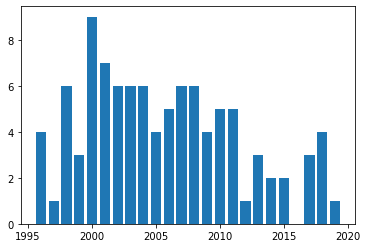

In [8]:
year = pd.Series(Counter(df['year released']))
plt.bar(x=list(year.keys()), height=year.values)
plt.show()

## Scores

In [9]:
print('min: %.f\nmax: %.f\nmean: %.1f\nstd: %.1f' % (df['score'].min(), df['score'].max(), df['score'].mean(), df['score'].std()))

min: 93
max: 99
mean: 94.8
std: 1.5


Score distribution is skewed towards the minimum. Which can be seen in the box and whiskers and also the histogram to the right.

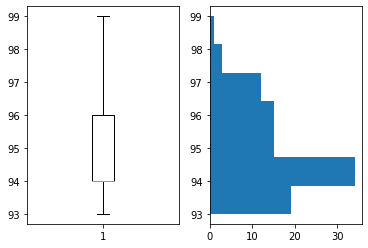

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].boxplot(list(df['score'].values))
ax[1].hist(list(df['score'].values), orientation='horizontal', bins=7)
plt.show()

Only four games got into the almost perfect club of 98 and 99 scores

In [11]:
df[df['score'] > 97].iloc[:,0:5]

,name,score,year released,platform,genre
5,The Legend of Zelda: Ocarina of Time,99.0,1998,Nintendo 64,"Action Adventure, Fantasy"
11,SoulCalibur,98.0,1999,Dreamcast,"Action, Fighting, 3D"
14,Tony Hawk's Pro Skater 2,98.0,2000,PlayStation,"Sports, Alternative, Skateboarding"
63,Grand Theft Auto IV,98.0,2008,PlayStation 3,"Action Adventure, Modern, Modern, Open-World"


# Platform
A good diversity of platforms exist in the list, but there are some clear frontrunners

In [12]:
platforms = pd.Series(Counter(df['platform']))
platforms

Nintendo 64          5
PC                  14
PlayStation          8
Dreamcast            3
PlayStation 2       16
Xbox                 7
GameCube             5
Game Boy Advance     2
Xbox 360             9
Wii                  4
PlayStation 3       11
DS                   1
3DS                  1
PlayStation Vita     1
Wii U                1
Xbox One             4
PlayStation 4        3
Switch               4
dtype: int64

Here's a quick figure to compare all of these visually

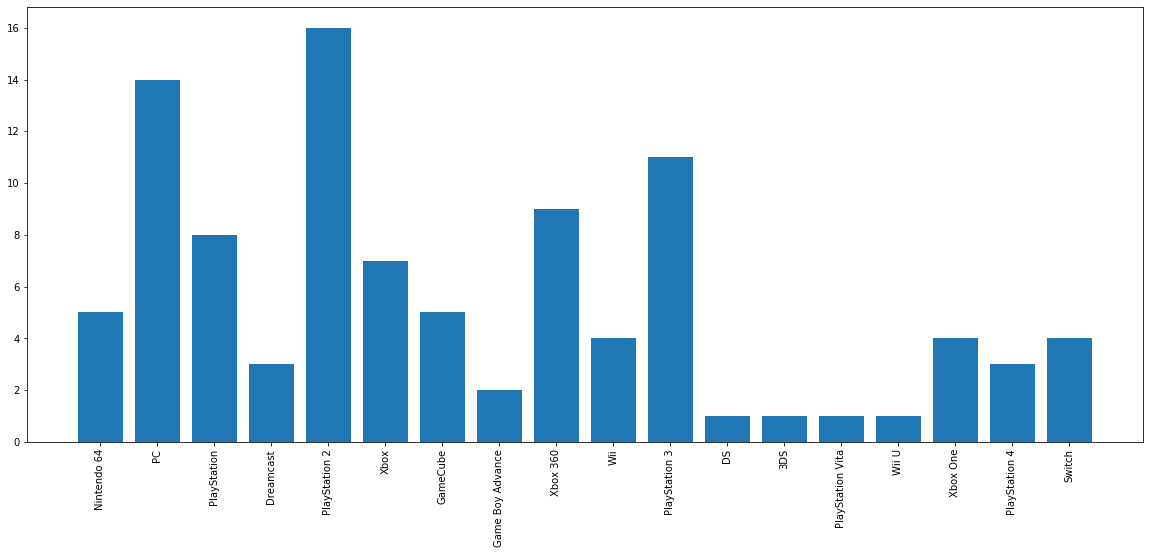

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x=list(platforms.keys()), height=platforms.values)
plt.xticks(rotation=90)
plt.show()

Playstation 2 does the best here. And sony does really well overall, except for the Vita.

In [14]:
platforms.sort_values(ascending=False)

PlayStation 2       16
PC                  14
PlayStation 3       11
Xbox 360             9
PlayStation          8
Xbox                 7
GameCube             5
Nintendo 64          5
Wii                  4
Xbox One             4
Switch               4
PlayStation 4        3
Dreamcast            3
Game Boy Advance     2
DS                   1
3DS                  1
PlayStation Vita     1
Wii U                1
dtype: int64

## Platform count per year
PS2 had a bumper year in 2001 with 6 titles.

In [15]:
platform_per_year = df.groupby(['year released', 'platform']).count().genre
results_dict = {}
for year in platform_per_year.index.levels[0]:
    results_dict[year] = [platform_per_year[year].idxmax(), platform_per_year[year].max()]
pd.DataFrame(results_dict, index=['platform', 'number of titles']).T

,platform,number of titles
1996,PC,3
1997,Nintendo 64,1
1998,PlayStation,3
1999,PlayStation,2
2000,PlayStation,3
2001,PlayStation 2,6
2002,PlayStation 2,4
2003,GameCube,2
2004,Xbox,3
2005,Xbox,2


# Genre

A lot of genres make this list at least once, although some entries are a little cryptic  
Action, shooters, fps, and other usual suspects populate the list a lot. I am happily surprised to see 'historic' rate so highly :)  
Please excuse my deletion of spaces, it makes it easier to prevent duplicates with typos hiding in the data

In [32]:
#compress genre entries into a single list and turn into a series
genre_words = []

temp_df = df['genre'].str.split(',')
for i in range(0,len(temp_df)):
    for word in temp_df.iloc[i]:
        genre_words.append(word.lower().replace(' ',''))
freq_genre = Counter(genre_words)
freq_genre = pd.Series(freq_genre).sort_values(ascending=False)
freq_genre

action              36
actionadventure     33
shooter             29
modern              27
sci-fi              24
first-person        21
3d                  20
fantasy             16
platformer          15
general             13
arcade              13
role-playing        13
sports               9
historic             9
open-world           9
2d                   8
fighting             8
actionrpg            6
sim                  5
football             5
traditional          5
racing               4
strategy             4
driving              4
adventure            4
console-stylerpg     4
western-style        4
third-person         4
alternative          4
puzzle               3
miscellaneous        3
gt/street            3
skateboarding        3
japanese-style       3
pc-stylerpg          2
turn-based           2
real-time            2
4x                   2
compilation          2
linear               2
sandbox              1
snowboarding         1
horror               1
command    

In [35]:
df

,name,score,year released,platform,genre,rating,playtime1,playtime2,playtime3,playtime4,playtime5,playtime6,playtime7,numbers?,review text
0,Super Mario 64,94.0,1996,Nintendo 64,"Action, Platformer, 3D",E,13 Hours,19 Hours,22.5 Hours,17 Hours,NaN,NaN,NaN,13.0,It has quickly grown to become the standard by...
1,Quake,94.0,1996,PC,"Action, Shooter, Shooter, First-Person, Sci-Fi...",M,5 Hours,6.5 Hours,8.5 Hours,6 Hours,NaN,NaN,NaN,9.0,"Satan, your game has arrived. It spits up bloo..."
2,Diablo,94.0,1996,PC,"Role-Playing, Action RPG, Action RPG",M,14.5 Hours,18.5 Hours,29 Hours,17 Hours,NaN,NaN,NaN,12.0,A feast of atmospheric entertainment. While it...
3,Sid Meier's Civilization II,94.0,1996,PC,"Strategy, Turn-Based, Historic, General, Histo...",K-A,25.5 Hours,--,32.5 Hours,26.5 Hours,NaN,NaN,NaN,7.0,It is an incredible and very addictive game; o...
4,GoldenEye 007,96.0,1997,Nintendo 64,"Action, Shooter, First-Person, Modern",T,10 Hours,17.5 Hours,21 Hours,12.5 Hours,NaN,NaN,NaN,21.0,This is probably the best game you can get on ...
5,The Legend of Zelda: Ocarina of Time,99.0,1998,Nintendo 64,"Action Adventure, Fantasy",E,26.5 Hours,30.5 Hours,39 Hours,30.5 Hours,NaN,NaN,NaN,22.0,"A slightly flawed masterpiece, but a masterpie..."
6,Tekken 3,96.0,1998,PlayStation,"Action, Fighting, 3D",T,2.5 Hours,12 Hours,31.5 Hours,11 Hours,NaN,NaN,NaN,15.0,"An amazing conversion, given the difference be..."
7,Half-Life,96.0,1998,PC,"Action, Shooter, Shooter, First-Person, Sci-Fi...",M,12 Hours,14 Hours,15.5 Hours,12.5 Hours,NaN,NaN,NaN,24.0,It isn't everyday that you come across a game ...
8,Gran Turismo,96.0,1998,PlayStation,"Driving, Racing, GT / Street",E,31 Hours,36.5 Hours,42.5 Hours,32.5 Hours,NaN,NaN,NaN,16.0,If you can get past its slightly intimidating ...
9,Metal Gear Solid,94.0,1998,PlayStation,"Action Adventure, Modern",M,11.5 Hours,12.5 Hours,16 Hours,12 Hours,NaN,NaN,NaN,20.0,"A cinematic classic. [Feb 2003, p.97]|A cinema..."
